In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v5.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,duration,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,is_active,idle_power,active_power,files,Unnamed: 19
0,3,Datacenter_1,4.099681e+06,0,storage,900000.0,899584.0,4635.372761,1.0000003378537212:,9447.595287,26885.162012,3.000001,0.003,0.004,198.0,False,3.0,5.8,"55596,3072,15.524809784082704:450990,1024,5.18...",NaN
1,3,Datacenter_1,4.099681e+06,1,storage,900000.0,899584.0,4552.153376,1.0000000057506384:,9447.595287,26402.489581,3.000000,0.003,0.004,198.0,False,3.0,5.8,"1002363,1024,5.178738666087011:287333,512,2.59...",NaN
2,3,Datacenter_1,4.099681e+06,2,storage,900000.0,899584.0,4712.463046,1.0000000137015315:,9447.595287,27332.285668,3.000000,0.003,0.004,198.0,False,3.0,5.8,"3-6852,8192,41.38862101694565:24-285602,512,2....",NaN
3,3,Datacenter_1,4.099681e+06,3,storage,900000.0,899584.0,4924.857340,1.0000000205963306:,9447.595287,28564.172570,3.000000,0.003,0.004,198.0,False,3.0,5.8,"303602,3584,18.10363760760568:1-591519,3072,15...",NaN
4,3,Datacenter_1,4.099681e+06,4,storage,900000.0,899584.0,4813.303893,1.000000024323157:,9447.595287,27917.162579,3.000000,0.003,0.004,198.0,False,3.0,5.8,"2-878359,1024,5.1852412125875285:2-1002249,102...",NaN


## Energy Consumption

#### Maximum energy consumption of persistent storage

The datacenter 'Datacenter_1' current persistent storage infrastructure at max can consume 0.11019999999999999 Kilo Joules (kJ/s) per second.


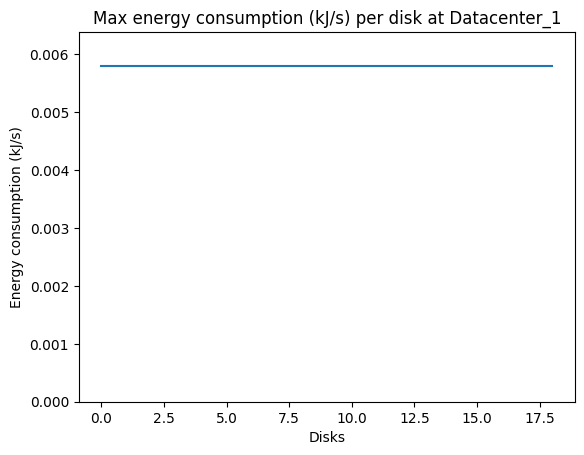

Datacenter_1's current persistent storage infrastructure can at max consume 1041.1250006461203 Kilo Joules (kJ) over the duration 9447.595287169874.


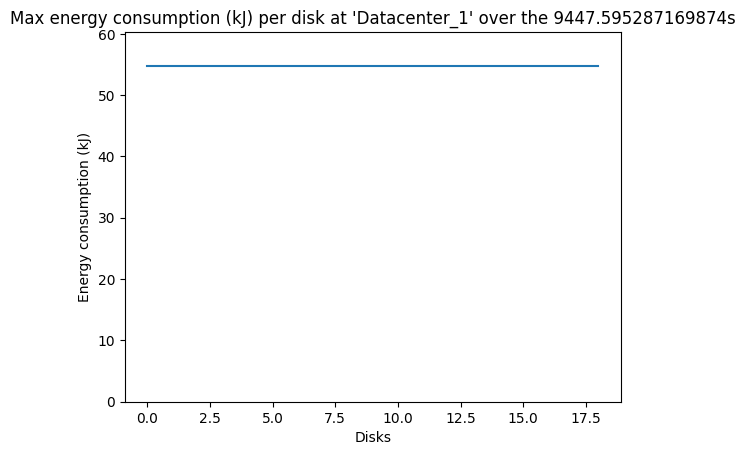

The datacenter 'Datacenter_2' current persistent storage infrastructure at max can consume 0.15778 Kilo Joules (kJ/s) per second.


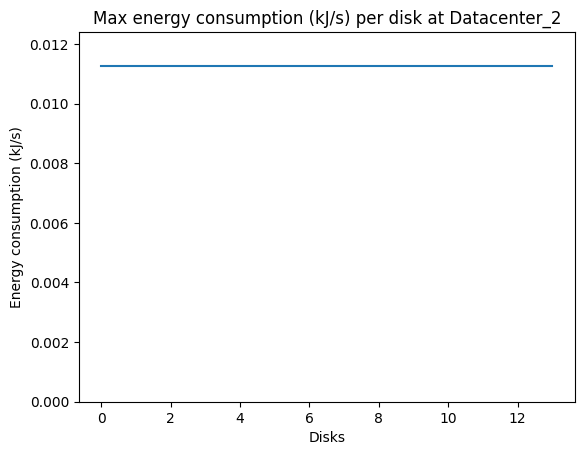

Datacenter_2's current persistent storage infrastructure can at max consume 1490.6415844096625 Kilo Joules (kJ) over the duration 9447.595287169874.


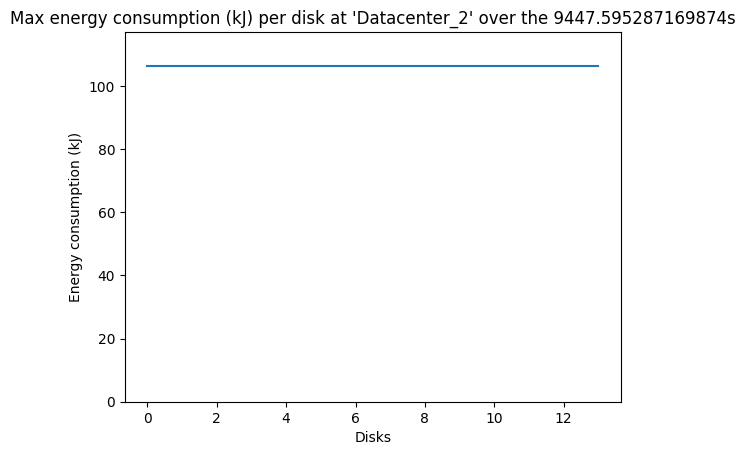

The datacenter 'Datacenter_3' current persistent storage infrastructure at max can consume 0.1582 Kilo Joules (kJ/s) per second.


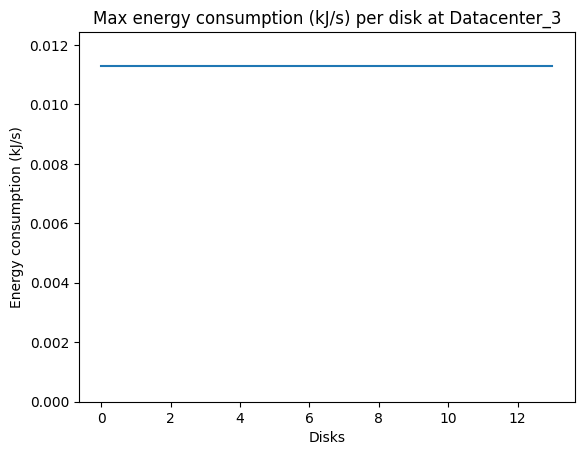

Datacenter_3's current persistent storage infrastructure can at max consume 1494.6095744302738 Kilo Joules (kJ) over the duration 9447.595287169874.


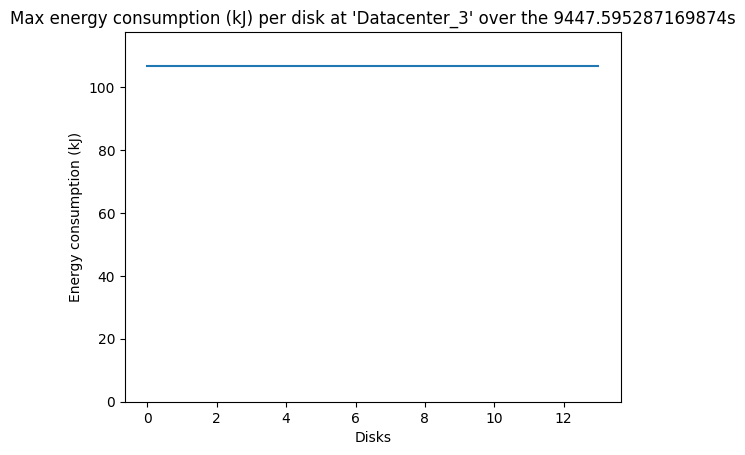

The datacenter 'Datacenter_4' current persistent storage infrastructure at max can consume 0.11954999999999999 Kilo Joules (kJ/s) per second.


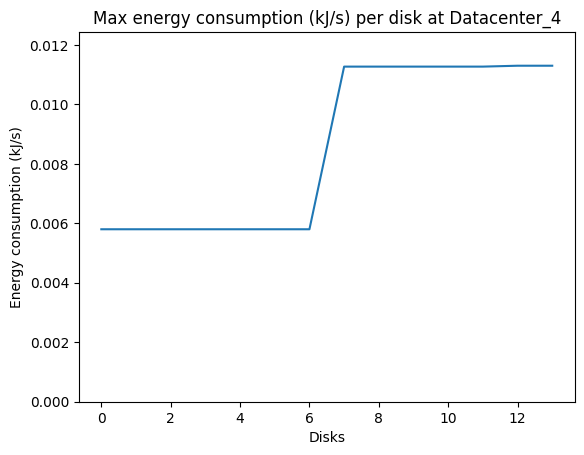

Datacenter_4's current persistent storage infrastructure can at max consume 1129.4600165811585 Kilo Joules (kJ) over the duration 9447.595287169874.


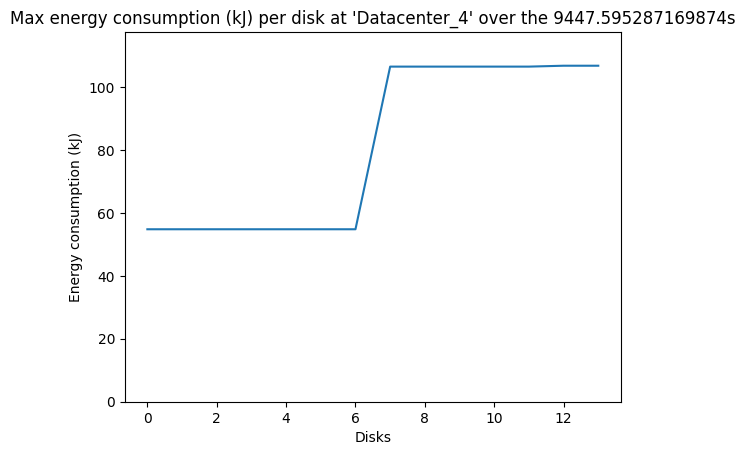

The cloud providers current computing infrastructure at max can consume 0.5457299999999998 Joules (J) per second and over a duration of 9447.595287169874 consume 48710253.55843258


In [12]:
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]

# max_power = 0
max_power_per_disk = np.array([])

# max_power_consumed = 0
max_power_consumed_per_disk = np.array([])

max_power_per_datacenter = np.array([])
max_power_consumed_per_datacenter = np.array([])

duration_per_disk = np.array([])

datacenter_disks = np.array([])

for i in range(len(labels)):
    # max_power_per_datacenter = 0
    max_power_per_disk_per_datacenter = np.array([])
    
    # max_power_consumed_per_datacenter = 0
    max_power_consumed_per_disk_per_datacenter = np.array([])
    
    duration_per_disk_per_datacenter = np.array([])
    
    disks = 0
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        disks += 1
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
                
        active_power = float(sample['active_power'])
        consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
        max_consumed_active_power = float(sample['active_power']) * float(sample['duration'])
        consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
        # max_power_per_datacenter += active_power
        max_power_per_disk = np.append(max_power_per_disk, active_power)
        max_power_per_disk_per_datacenter = np.append(max_power_per_disk_per_datacenter, active_power)
        max_power_consumed_per_disk = np.append(max_power_consumed_per_disk, float(sample['active_power'])*duration)
        max_power_consumed_per_disk_per_datacenter = np.append(max_power_consumed_per_disk_per_datacenter, float(sample['active_power'])*duration)
        duration_per_disk_per_datacenter = np.append(duration_per_disk_per_datacenter, sample['duration'])
    max_power_per_datacenter = np.append(max_power_per_datacenter, np.sum(max_power_per_disk_per_datacenter))
    max_power_consumed_per_datacenter = np.append(max_power_consumed_per_datacenter, np.sum(max_power_consumed_per_disk_per_datacenter))
    datacenter_disks = np.append(datacenter_disks, disks)
    # max_power += np.sum(max_power_per_disk_per_datacenter)
    
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure at max can consume {(np.sum(max_power_per_disk_per_datacenter) * 1)/1000} Kilo Joules (kJ/s) per second.")
    plt.plot(np.arange(0, len(max_power_per_disk_per_datacenter)), ((max_power_per_disk_per_datacenter*1)/1000))
    plt.ylim((0, (max(max_power_per_disk_per_datacenter) + (max(max_power_per_disk_per_datacenter) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ/s)")
    plt.title(f"Max energy consumption (kJ/s) per disk at {labels[i]}")
    plt.show()
    
    print(f"{labels[i]}'s current persistent storage infrastructure can at max consume {(np.sum(max_power_consumed_per_disk_per_datacenter))/1000} Kilo Joules (kJ) over the duration {duration}.")
    plt.plot(np.arange(0, len(max_power_consumed_per_disk_per_datacenter)), ((max_power_consumed_per_disk_per_datacenter)/1000))
    plt.ylim((0, (max(max_power_consumed_per_disk_per_datacenter) + (max(max_power_consumed_per_disk_per_datacenter) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Max energy consumption (kJ) per disk at '{labels[i]}' over the {duration}s")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(np.sum(max_power_per_disk) * 1)/1000} Joules (J) per second and over a duration of {duration} consume {(np.sum(max_power_consumed_per_disk) * duration)/1000}")

#### Current energy consumption of persistent storage

The datacenter 'Datacenter_1' current persistent storage infrastructure is consumes 0.11019999999999999 Kilo Joules (kJ) per second.
The datacenter 'Datacenter_1' current persistent storage infrastructure is consuming 790.086001887893 Kilo Joules (kJ) over the duration 9447.595287169874s.


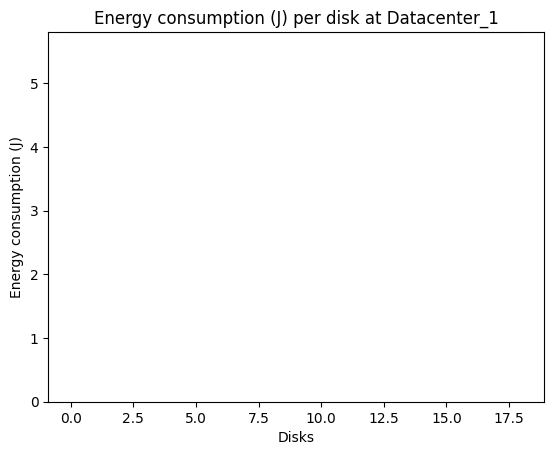

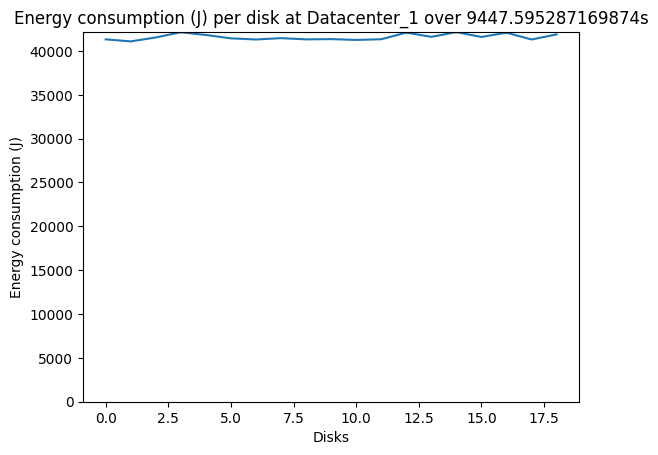

The datacenter 'Datacenter_2' current persistent storage infrastructure is consumes 0.26798 Kilo Joules (kJ) per second.
The datacenter 'Datacenter_2' current persistent storage infrastructure is consuming 1395.6595898006544 Kilo Joules (kJ) over the duration 9447.595287169874s.


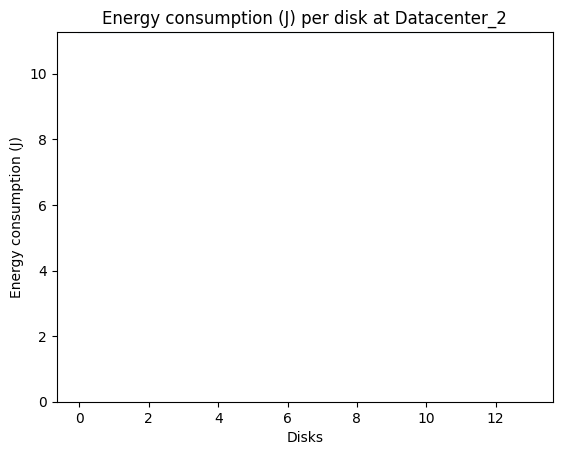

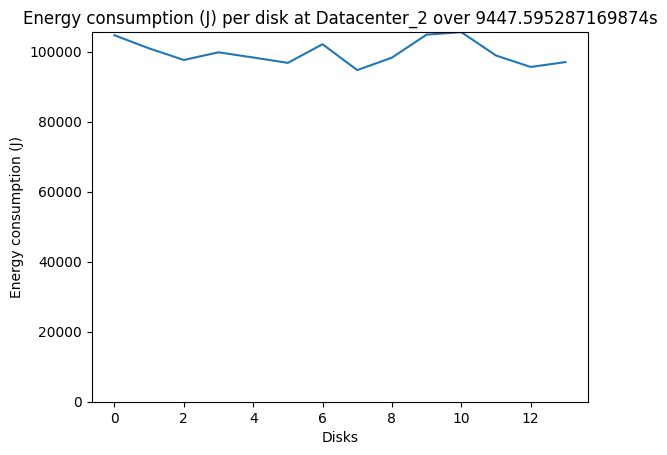

The datacenter 'Datacenter_3' current persistent storage infrastructure is consumes 0.42618000000000006 Kilo Joules (kJ) per second.
The datacenter 'Datacenter_3' current persistent storage infrastructure is consuming 1377.540181529556 Kilo Joules (kJ) over the duration 9447.595287169874s.


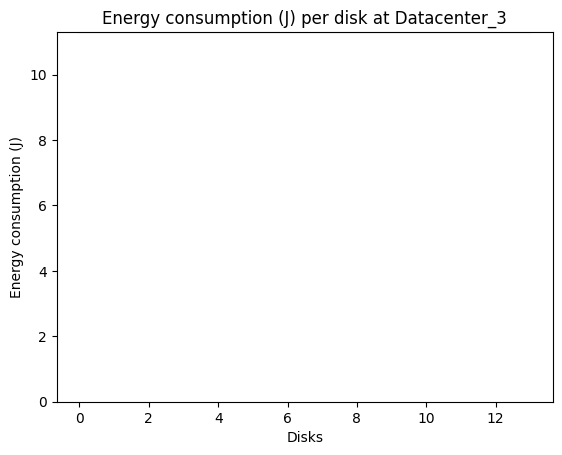

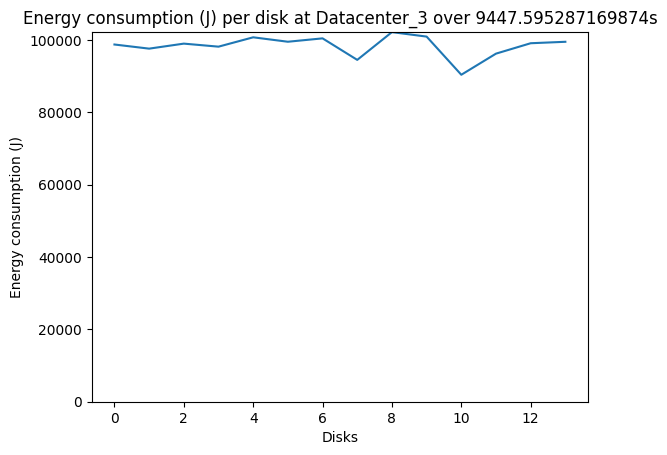

The datacenter 'Datacenter_4' current persistent storage infrastructure is consumes 0.54573 Kilo Joules (kJ) per second.
The datacenter 'Datacenter_4' current persistent storage infrastructure is consuming 992.3175621368678 Kilo Joules (kJ) over the duration 9447.595287169874s.


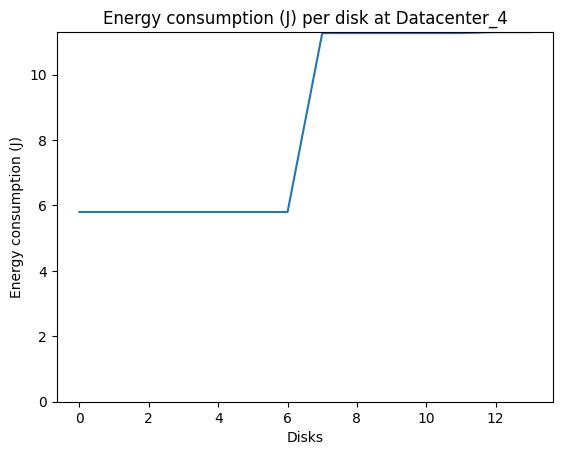

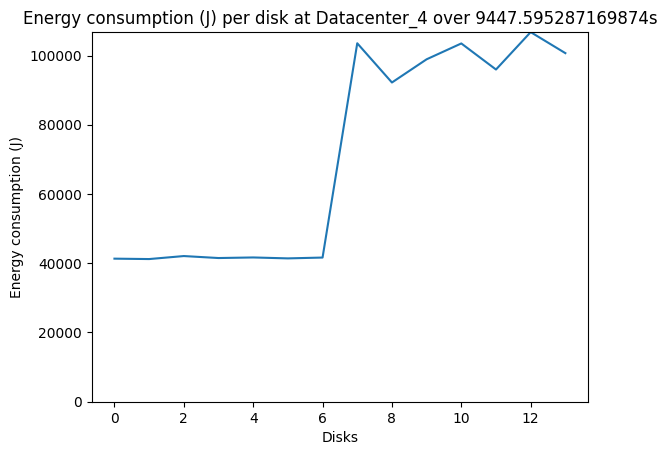

The cloud providers current storage area network consumes 0.54573 Kilo Joules (kJ) per second.
The cloud providers current storage area network is consuming 4555.603335354972 Kilo Joules (kJ) over the duration 9447.595287169874s.


In [13]:
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]

current_power = 0
current_power_per_disk = np.array([])

current_power_consumed = 0
current_power_consumed_per_disk = np.array([])

current_power_per_datacenter = np.array([])
current_power_consumed_per_datacenter = np.array([])

datacenter_disks_on = np.array([])
datacenter_disks_idle = np.array([])


for i in range(len(labels)):
    # current_power_per_datacenter = 0
    current_power_per_disk_per_datacenter = np.array([])
    
    # current_power_consumed_per_datacenter = 0
    current_power_consumed_per_disk_per_datacenter = np.array([])
    
    disks_on = 0
    disks_off = 0
    
    duration_per_disk_per_datacenter = np.array([])
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
        
        # If disk was active it is considered active and if was not at all it is considered idle
        if sample['is_active'] == True or float(sample['active_duration']) > 0:
            disks_on += 1
            # current_power_per_datacenter += float(sample['active_power'])
            current_power_per_disk = np.append(current_power_per_disk, float(sample['active_power']))
            current_power_per_disk_per_datacenter = np.append(current_power_per_disk_per_datacenter, float(sample['active_power']))
        else:
            disks_on += 1
            # current_power_per_datacenter += float(sample['idle_power'])
            current_power_per_disk = np.append(current_power_per_disk, float(sample['idle_power']))
            current_power_per_disk_per_datacenter = np.append(current_power_per_disk_per_datacenter, float(sample['idle_power']))
        
        consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
        consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
        
        # current_power_consumed_per_datacenter += consumed_active_power + consumed_idle_power
        current_power_consumed_per_disk = np.append(current_power_consumed_per_disk, consumed_active_power + consumed_idle_power)
        current_power_consumed_per_disk_per_datacenter = np.append(current_power_consumed_per_disk_per_datacenter, consumed_active_power + consumed_idle_power)
        duration_per_disk = np.append(duration_per_disk, float(sample['duration']))
    current_power_per_datacenter = np.append(current_power_per_datacenter, np.sum(current_power_per_disk_per_datacenter)) 
    current_power_consumed_per_datacenter = np.append(current_power_consumed_per_datacenter, np.sum(current_power_consumed_per_disk_per_datacenter)) 
    
    datacenter_disks_on = np.append(datacenter_disks_on, disks_on) 
    datacenter_disks_idle = np.append(datacenter_disks_idle, datacenter_disks_idle) 
    
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consumes {(np.sum(current_power_per_datacenter) * 1)/1000} Kilo Joules (kJ) per second.") # Get actual duration, get average power? or the power consumed power over the duration?
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consuming {(np.sum(current_power_consumed_per_disk_per_datacenter) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.") # Get actual duration, get average power? or the power consumed power over the duration?
    # current_power += current_power_per_datacenter
    # current_power_consumed += current_power_consumed_per_datacenter
    
    plt.plot(np.arange(0, len(current_power_per_disk_per_datacenter)), (current_power_per_disk_per_datacenter*1))
    plt.ylim((0, max(current_power_per_disk_per_datacenter)))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]}")
    plt.show()
    
    plt.plot(np.arange(0, len(current_power_consumed_per_disk_per_datacenter)), (current_power_consumed_per_disk_per_datacenter*1))
    plt.ylim((0, max(current_power_consumed_per_disk_per_datacenter)))
    plt.xlabel("Disks")
    plt.ylabel(f"Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]} over {duration}s")
    plt.show()

print(f"The cloud providers current storage area network consumes {(np.sum(current_power_per_datacenter) * 1)/1000} Kilo Joules (kJ) per second.") # Get actual duration, get average power? or the power consumed power over the duration?
print(f"The cloud providers current storage area network is consuming {(np.sum(current_power_consumed_per_datacenter) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.") # Get actual duration, get average power? or the power consumed power over the duration?

#### Minimum energy consumption of persistent storage

Reducing the number of disks powered on

The datacenter 'Datacenter_1' current persistent storage infrastructure consumes 0.11019999999999999 Kilo Joules (kJ).
 The datacenter could also have 0 disks powered off.

The datacenter 'Datacenter_1' current persistent storage infrastructure is consuming 790.086001887893 Kilo Joules (kJ) over the duration 9447.595287169874s.
 The datacenter could also have 0 disks powered off.
The datacenter 'Datacenter_1' current persistent storage infrastructure state is consuming 0.11019999999999999 Kilo Joules (kJ/s) per second.


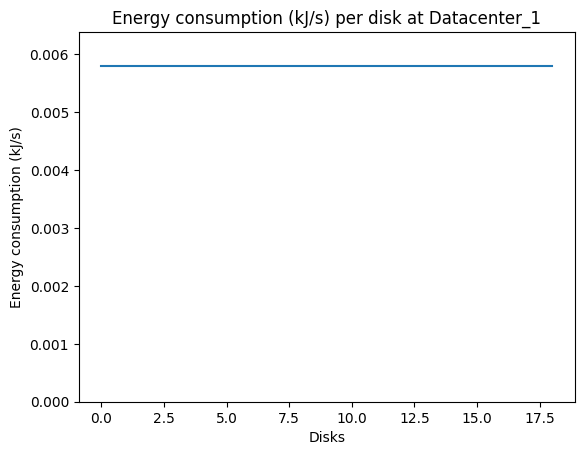

Datacenter_1's current persistent storage infrastructure has consumed 790.086001887893 Kilo Joules (kJ) over the duration 9447.595287169874.


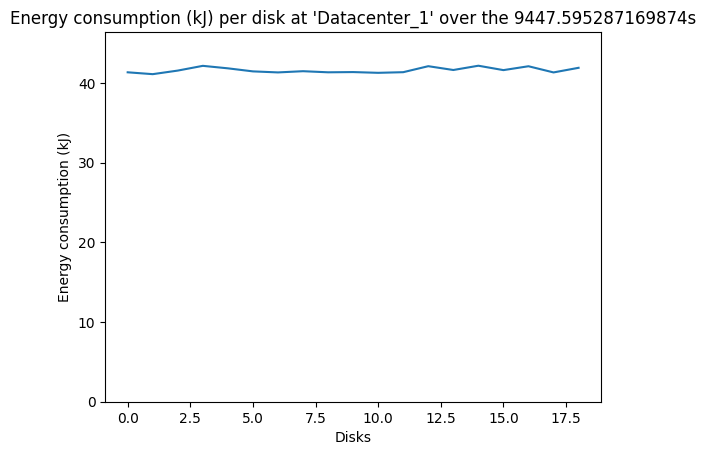

The datacenter 'Datacenter_2' current persistent storage infrastructure consumes 0.15778 Kilo Joules (kJ).
 The datacenter could also have 0 disks powered off.

The datacenter 'Datacenter_2' current persistent storage infrastructure is consuming 1395.6595898006544 Kilo Joules (kJ) over the duration 9447.595287169874s.
 The datacenter could also have 0 disks powered off.
The datacenter 'Datacenter_2' current persistent storage infrastructure state is consuming 0.15778 Kilo Joules (kJ/s) per second.


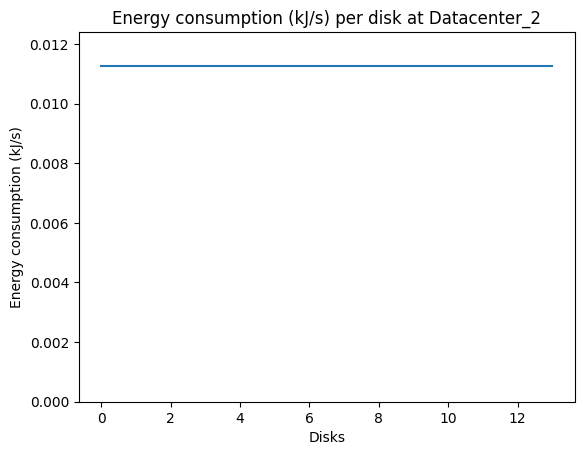

Datacenter_2's current persistent storage infrastructure has consumed 1395.6595898006544 Kilo Joules (kJ) over the duration 9447.595287169874.


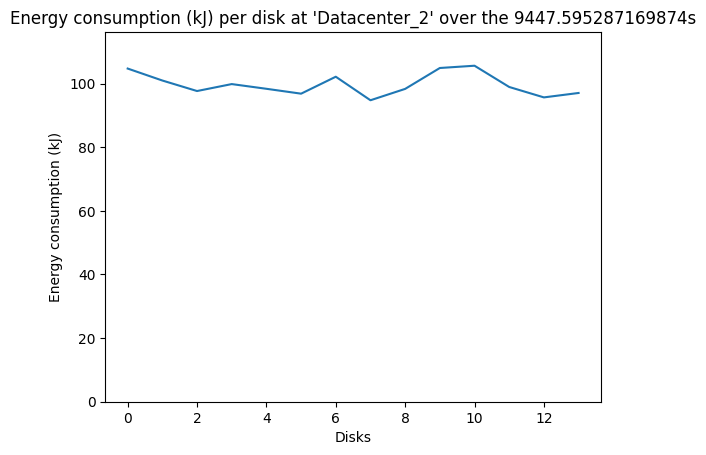

The datacenter 'Datacenter_3' current persistent storage infrastructure consumes 0.1582 Kilo Joules (kJ).
 The datacenter could also have 0 disks powered off.

The datacenter 'Datacenter_3' current persistent storage infrastructure is consuming 1377.540181529556 Kilo Joules (kJ) over the duration 9447.595287169874s.
 The datacenter could also have 0 disks powered off.
The datacenter 'Datacenter_3' current persistent storage infrastructure state is consuming 0.1582 Kilo Joules (kJ/s) per second.


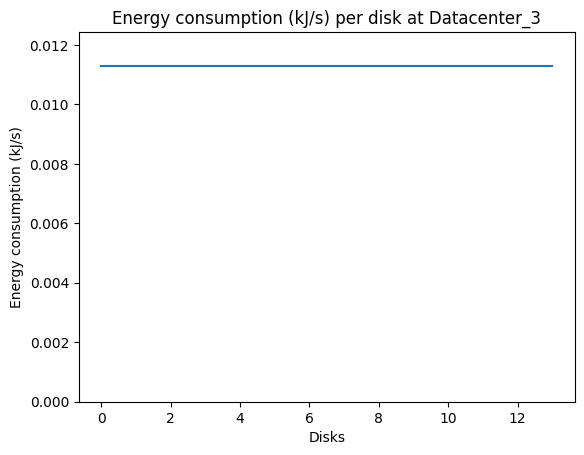

Datacenter_3's current persistent storage infrastructure has consumed 1377.540181529556 Kilo Joules (kJ) over the duration 9447.595287169874.


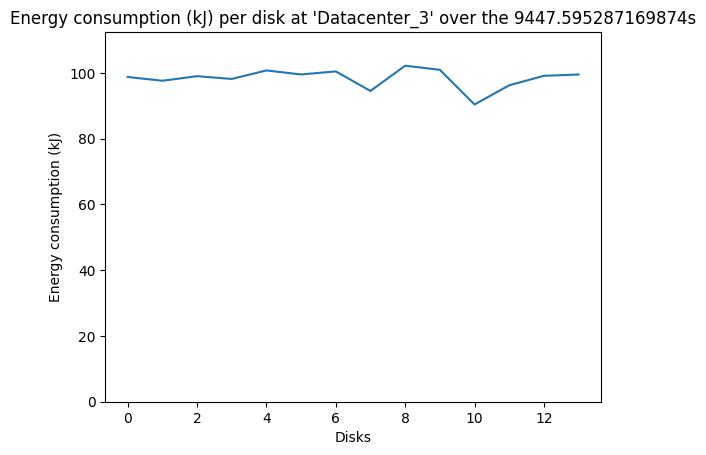

The datacenter 'Datacenter_4' current persistent storage infrastructure consumes 0.11954999999999999 Kilo Joules (kJ).
 The datacenter could also have 0 disks powered off.

The datacenter 'Datacenter_4' current persistent storage infrastructure is consuming 992.3175621368678 Kilo Joules (kJ) over the duration 9447.595287169874s.
 The datacenter could also have 0 disks powered off.
The datacenter 'Datacenter_4' current persistent storage infrastructure state is consuming 0.11954999999999999 Kilo Joules (kJ/s) per second.


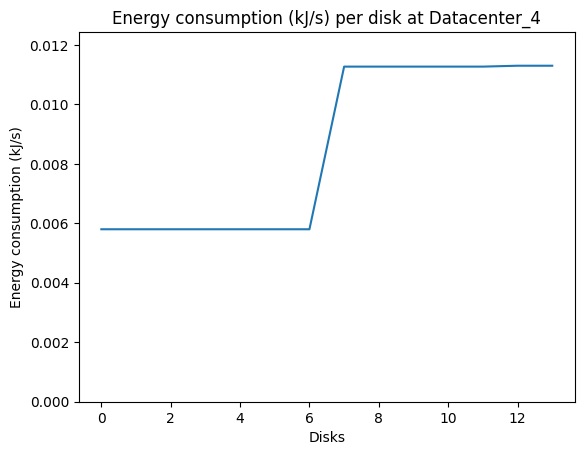

Datacenter_4's current persistent storage infrastructure has consumed 992.3175621368678 Kilo Joules (kJ) over the duration 9447.595287169874.


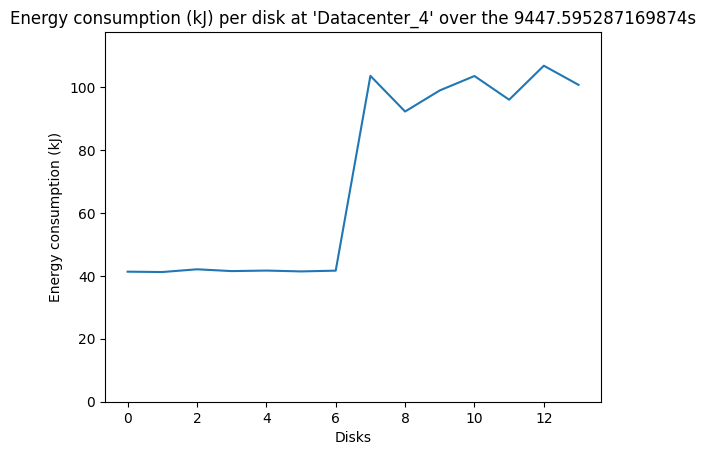

The cloud providers current storage area network consumes 0.54573 Kilo Joules (kJ).
 The cloud provider could also have 0.0 disks powered off.

The cloud providers current storage area network is consuming 4555.603335354972 Kilo Joules (kJ) over the duration 9447.595287169874s.
 The cloud provider could also have 0.0 disks powered off.


In [20]:
labels = np.unique(dataset['datacenter_name'])


cloud_provider_power_per_disk_power_down_disks = np.array([])
cloud_provider_power_per_disk_consumed_power_down_disks = np.array([])
datacenter_power_per_disk_power_down_disks = np.array([])
datacenter_power_per_disk_consumed_power_down_disks = np.array([])

datacenter_power_down_disks_on = np.array([])
# Powering down idle and unused disks
datacenter_power_down_disks_off = np.array([])

duration = dataset['duration'][0]
disks_powered_off = 0
for i in range(len(labels)):
    
    power_per_disk_per_datacenter_powered_down_disks = np.array([])
    power_consumed_per_disk_per_datacenter_powered_down_disks = np.array([])
    
    
    disks_on = 0
    disks_off = 0
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        # If capacity used is 0, the disk is powered off
        consumed_active_power = 0
        consumed_idle_power = 0
        disk_state_power = 0
        if sample['capacity_used'] != 0:
            consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
            consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
            
            if sample['is_active'] == True or float(sample['active_duration']) > 0:
                disk_state_power = float(sample['active_power'])
                disks_on += 1
            else: # Powering down unused disks
                disk_state_power = 0
                disks_off += 1
        else: # Powering down a disks that has no data
            disk_state_power = 0
            disks_off += 1
        
        # datacenter_power_per_disk_power_down_disks += current_disk_power
        cloud_provider_power_per_disk_power_down_disks = np.append(cloud_provider_power_per_disk_power_down_disks, disk_state_power)
        power_per_disk_per_datacenter_powered_down_disks = np.append(power_per_disk_per_datacenter_powered_down_disks, disk_state_power)
        
        # datacenter_power_per_disk_consumed_power_down_disks += consumed_active_power + consumed_idle_power
        cloud_provider_power_per_disk_consumed_power_down_disks = np.append(cloud_provider_power_per_disk_consumed_power_down_disks, consumed_active_power + consumed_idle_power)
        power_consumed_per_disk_per_datacenter_powered_down_disks = np.append(power_consumed_per_disk_per_datacenter_powered_down_disks, consumed_active_power + consumed_idle_power)
        duration_per_disk = np.append(duration_per_disk, float(sample['duration']))
    datacenter_power_per_disk_power_down_disks = np.append(datacenter_power_per_disk_power_down_disks, np.sum(power_per_disk_per_datacenter_powered_down_disks))
    datacenter_power_per_disk_consumed_power_down_disks = np.append(datacenter_power_per_disk_consumed_power_down_disks, np.sum(power_consumed_per_disk_per_datacenter_powered_down_disks))
    
    datacenter_power_down_disks_on = np.append(datacenter_power_down_disks_on, disks_on)
    datacenter_power_down_disks_off = np.append(datacenter_power_down_disks_off, disks_off)
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure consumes {(np.sum(power_per_disk_per_datacenter_powered_down_disks) * 1)/1000} Kilo Joules (kJ).\n The datacenter could also have {disks_off} disks powered off.\n")
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consuming {(np.sum(power_consumed_per_disk_per_datacenter_powered_down_disks) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.\n The datacenter could also have {disks_off} disks powered off.")
    
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure state is consuming {(np.sum(power_per_disk_per_datacenter_powered_down_disks) * 1)/1000} Kilo Joules (kJ/s) per second.")
    plt.plot(np.arange(0, len(power_per_disk_per_datacenter_powered_down_disks)), ((power_per_disk_per_datacenter_powered_down_disks*1)/1000))
    plt.ylim((0, (max(power_per_disk_per_datacenter_powered_down_disks) + (max(power_per_disk_per_datacenter_powered_down_disks) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ/s)")
    plt.title(f"Energy consumption (kJ/s) per disk at {labels[i]}")
    # plt.savefig(f"../figs/storage/power/{labels[i]}_storage_power_down_unused.eps", format="eps")
    plt.show()
    
    print(f"{labels[i]}'s current persistent storage infrastructure has consumed {(np.sum(power_consumed_per_disk_per_datacenter_powered_down_disks))/1000} Kilo Joules (kJ) over the duration {duration}.")
    plt.plot(np.arange(0, len(power_consumed_per_disk_per_datacenter_powered_down_disks)), ((power_consumed_per_disk_per_datacenter_powered_down_disks)/1000))
    plt.ylim((0, (max(power_consumed_per_disk_per_datacenter_powered_down_disks) + (max(power_consumed_per_disk_per_datacenter_powered_down_disks) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption (kJ) per disk at '{labels[i]}' over the {duration}s")
    # plt.savefig(f"../figs/storage/power/{labels[i]}_storage_power_down_unused_duration.eps", format="eps")
    plt.show()

print(f"The cloud providers current storage area network consumes {(np.sum(datacenter_power_per_disk_power_down_disks) * 1)/1000} Kilo Joules (kJ).\n The cloud provider could also have {np.sum(datacenter_power_down_disks_off)} disks powered off.\n") # Get actual duration, get average power? or the power consumed power over the duration?
print(f"The cloud providers current storage area network is consuming {(np.sum(datacenter_power_per_disk_consumed_power_down_disks) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.\n The cloud provider could also have {np.sum(datacenter_power_down_disks_off)} disks powered off.") # Get actual duration, get average power? or the power consumed power over the duration?

### Comparing and Combining Approaches

An additional aspect of reducing power consumption not investigated in this system is powering down the storage server that the HDD is connected to where may contain more than one disk per host.

Saved energy consumption:
- Powering down disks 0.0kJ/s


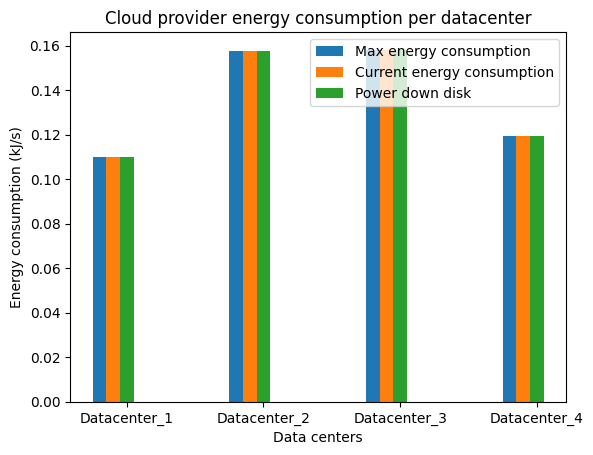

In [ ]:
labels = np.unique(dataset['datacenter_name'])
print(f"Saved energy consumption:")
print(f"- Powering down disks {((np.sum(current_power_per_datacenter) * 1)/1000) - ((np.sum(power_per_datacenter_powered_down_disks) * 1)/1000)}kJ/s")
# print(f"- DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")
# print(f"- powering down host and DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")

x = np.arange(len(labels))
bar_width = 0.1
plt.bar(x - 0.2, (max_power_per_datacenter / 1000) * 1, width=bar_width, label="Max energy consumption")
plt.bar(x - 0.1, (current_power_per_datacenter / 1000) * 1, width=bar_width, label="Current energy consumption")
plt.bar(x, (power_per_datacenter_powered_down_disks / 1000) * 1, width=bar_width, label="Power down disk")
# plt.bar(x + 0.1, (min_host_power_per_host / 1000) * 1, width=bar_width, label="DVFS energy consumption")
# plt.bar(x + 0.2, (min_host_power_per_host / 1000) * 1, width=bar_width, label="Power down hosts and DVFS energy consumption")
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ/s)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.legend()
plt.show()

Saved energy consumption over the duration 9447.595287169874:
- Powering down disks 0.0kJ


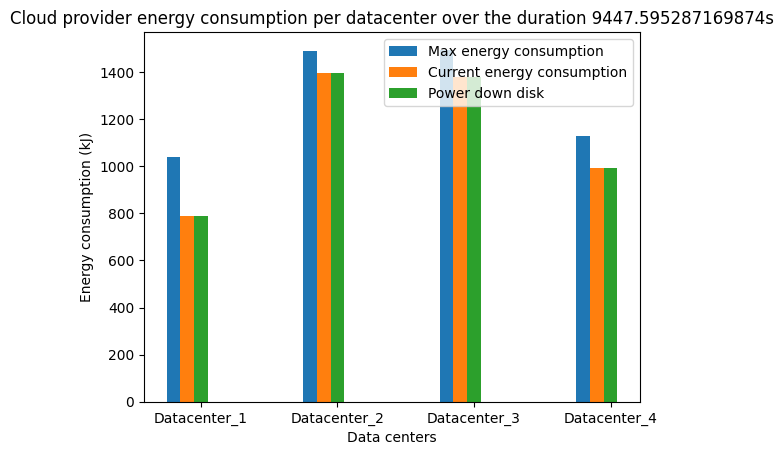

In [ ]:
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]

print(f"Saved energy consumption over the duration {duration}:")
print(f"- Powering down disks {((np.sum(current_power_consumed_per_datacenter) * duration)/1000) - ((np.sum(power_consumed_per_datacenter_powered_down_disks) * duration)/1000)}kJ")
# print(f"- DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")
# print(f"- powering down disks and DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")

x = np.arange(len(labels))
bar_width = 0.1
plt.bar(x - 0.2, (max_power_consumed_per_datacenter / 1000) * 1, width=bar_width, label="Max energy consumption")
plt.bar(x - 0.1, (current_power_consumed_per_datacenter / 1000) * 1, width=bar_width, label="Current energy consumption")
plt.bar(x, (power_consumed_per_datacenter_powered_down_disks / 1000) * 1, width=bar_width, label="Power down disk")
# plt.bar(x + 0.1, (min_host_power_per_host / 1000) * 1, width=bar_width, label="DVFS energy consumption")
# plt.bar(x + 0.2, (min_host_power_per_host / 1000) * 1, width=bar_width, label="Power down disks and DVFS energy consumption")
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter over the duration {duration}s")
plt.legend()
plt.show()

### Calculating Power Usage Effectiveness (PUE) for the storage system.

In [ ]:
print(f"Power Usage Effectiveness (PUE) (scoped to storage) of approaches:")
print(f"- Current system {np.sum(max_power_per_datacenter)/1000 - np.sum(current_power_per_datacenter)/1000}")
print(f"- Powering down disks {np.sum(max_power_per_datacenter)/1000 - np.sum(power_per_datacenter_powered_down_disks)/1000}")
# print(f"- DVFS {np.sum(cloud_provider_max_power_consumption_per_datacenter)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports)/1000}")
# print(f"- Powering down disks and DVFS {np.sum(cloud_provider_max_power_consumption_per_datacenter)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)/1000}")

Power Usage Effectiveness (PUE) (scoped to storage) of approaches:
- Current system 0.0
- Powering down disks 0.0


In [ ]:
print(f"Power Usage Effectiveness (PUE) (scoped to storage) of approaches over the duration {duration}:")
print(f"- Current system {(np.sum(max_power_per_datacenter) * duration) - (np.sum(current_power_per_datacenter) * duration)}")
print(f"- Powering down disks {(np.sum(max_power_per_datacenter) * duration) - (np.sum(power_per_datacenter_powered_down_disks) * duration)}")
# print(f"- DVFS {np.sum(cloud_provider_max_power_consumption_per_datacenter) - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports)}")
# print(f"- Powering down disks and DVFS {np.sum(cloud_provider_max_power_consumption_per_datacenter)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)/1000}")

Power Usage Effectiveness (PUE) (scoped to storage) of approaches over the duration 9447.595287169874:
- Current system 0.0
- Powering down disks 0.0
